# 데이터 지수화 - 최초 접안지수
### 풍속 , 풍향 , 유의파고

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('data/trans2018.csv', encoding='cp949')

df = pd.DataFrame(data)

In [133]:
df.head()

,일시,풍속(m/s),풍향(deg),유의파고(m),파향(deg),강수량(mm)
0,2018-01-01 0:00,10.3,330,3.2,285,0.0
1,2018-01-01 1:00,10.0,304,3.3,313,0.0
2,2018-01-01 2:00,9.8,304,3.5,270,0.0
3,2018-01-01 3:00,10.4,317,3.4,272,0.0
4,2018-01-01 4:00,11.3,320,3.5,274,0.0


In [4]:
df.isnull().sum()

일시         0
풍속(m/s)    0
풍향(deg)    0
유의파고(m)    0
파향(deg)    0
강수량(mm)    0
dtype: int64

In [98]:
# data2019_1 = df.fillna(method='bfill')
# data2019_1.head()

In [99]:
# data2019_1.isnull().sum()

In [5]:
data2018_1 = df[['일시','풍속(m/s)','풍향(deg)','유의파고(m)']]

In [6]:
data2018_1.isnull().sum()

일시         0
풍속(m/s)    0
풍향(deg)    0
유의파고(m)    0
dtype: int64

In [7]:
data2018_1.head()

,일시,풍속(m/s),풍향(deg),유의파고(m)
0,2018-01-01 0:00,10.3,330,3.2
1,2018-01-01 1:00,10.0,304,3.3
2,2018-01-01 2:00,9.8,304,3.5
3,2018-01-01 3:00,10.4,317,3.4
4,2018-01-01 4:00,11.3,320,3.5


In [8]:
#풍향
def func_winddeg_index(x) :
    if 160<x<=270:
        return 1
    elif 135<x<=160 or 270<x<=290:
        return 2
    elif 105<x<=135 or 290<x<=315:
        return 3
    elif 0<=x<=105 or 315<x<=360:
        return 4
    

#풍속 함수정의 -> 풍향에서 살짝 바꿈
def func_windspeed_index(x):
    if x<=4:
        return 4
    elif 4<x<=9:
        return 3
    elif 9<x<=14:
        return 2
    elif 14<x:
        return 1

#파고
def func_wave_index(x):
    if x<=0.5:
        return 4
    elif 0.5<x<=1.0:
        return 3
    elif 1.0<x<=2.0:
        return 2
    elif 2.0<x:
        return 1

In [48]:
print(func_rain_index(0))

5


In [9]:
# df = df[['일시','풍속(m/s)','풍향(deg)','유의파고(m)']]
data2018_1['wind_speed_index'] = data2018_1['풍속(m/s)'].apply(lambda x : func_windspeed_index(x))

<ipython-input-9-8161215d4f9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2018_1['wind_speed_index'] = data2018_1['풍속(m/s)'].apply(lambda x : func_windspeed_index(x))


In [10]:
data2018_1.head()

,일시,풍속(m/s),풍향(deg),유의파고(m),wind_speed_index
0,2018-01-01 0:00,10.3,330,3.2,2
1,2018-01-01 1:00,10.0,304,3.3,2
2,2018-01-01 2:00,9.8,304,3.5,2
3,2018-01-01 3:00,10.4,317,3.4,2
4,2018-01-01 4:00,11.3,320,3.5,2


In [11]:
data2018_1['wind_deg_index'] = data2018_1['풍향(deg)'].apply(lambda x : func_winddeg_index(x))

In [12]:
data2018_1.head()

,일시,풍속(m/s),풍향(deg),유의파고(m),wind_speed_index,wind_deg_index
0,2018-01-01 0:00,10.3,330,3.2,2,4
1,2018-01-01 1:00,10.0,304,3.3,2,3
2,2018-01-01 2:00,9.8,304,3.5,2,3
3,2018-01-01 3:00,10.4,317,3.4,2,4
4,2018-01-01 4:00,11.3,320,3.5,2,4


In [13]:
data2018_1['wave_index'] = data2018_1['유의파고(m)'].apply(lambda x : func_wave_index(x))

In [14]:
data2018_1.head()

,일시,풍속(m/s),풍향(deg),유의파고(m),wind_speed_index,wind_deg_index,wave_index
0,2018-01-01 0:00,10.3,330,3.2,2,4,1
1,2018-01-01 1:00,10.0,304,3.3,2,3,1
2,2018-01-01 2:00,9.8,304,3.5,2,3,1
3,2018-01-01 3:00,10.4,317,3.4,2,4,1
4,2018-01-01 4:00,11.3,320,3.5,2,4,1


In [15]:
data2018_1.describe()

,풍속(m/s),풍향(deg),유의파고(m),wind_speed_index,wind_deg_index,wave_index
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,6.017076,187.605861,1.379774,3.105573,2.618207,2.394485
std,3.151017,103.287013,0.910319,0.700993,1.345456,0.950558
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,3.650000,90.000000,0.700000,3.000000,1.000000,2.000000
50%,5.500000,204.000000,1.200000,3.000000,3.000000,2.000000
75%,8.000000,275.000000,1.800000,4.000000,4.000000,3.000000
max,21.900000,360.000000,7.200000,4.000000,4.000000,4.000000


### 가중치 설정 
#### 풍속 : 4.5점 / 파고 : 4점 / 풍향 :3.5점 총합 12 -> 각 점수를 총합으로 나눔
#### 풍속 : 0.38 / 파고 : 0.33 / 풍향 : 0.29점

In [16]:
data2018_1['berthing_index'] = (data2018_1['wind_speed_index']*0.38) + (data2018_1['wind_deg_index']*0.33) + (data2018_1['wave_index']*0.29)

In [18]:
data2018_1['berthing_index2'] = data2018_1['berthing_index']/4

In [19]:
data2018_1.head()

,일시,풍속(m/s),풍향(deg),유의파고(m),wind_speed_index,wind_deg_index,wave_index,berthing_index,berthing_index2
0,2018-01-01 0:00,10.3,330,3.2,2,4,1,2.37,0.5925
1,2018-01-01 1:00,10.0,304,3.3,2,3,1,2.04,0.5100
2,2018-01-01 2:00,9.8,304,3.5,2,3,1,2.04,0.5100
3,2018-01-01 3:00,10.4,317,3.4,2,4,1,2.37,0.5925
4,2018-01-01 4:00,11.3,320,3.5,2,4,1,2.37,0.5925


In [21]:
output_file="data/berthing_index_2018.csv"
data2018_1.to_csv(output_file, index=False)

In [90]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import font_manager, rc
# import matplotlib

# font_location = "/usr/share/fonts/truetype/CookieRun/CookieRun Bold.ttf"
# font_name = font_manager.FontProperties(fname=font_location).get_name()
# matplotlib.rc('font', family=font_name)

,일시,풍속(m/s),풍향(deg),유의파고(m),파향(deg),강수량(mm)
2,2019-01-01 2:00,6.1,317,0.5,38,0.0
8,2019-01-01 8:00,5.1,315,0.5,38,0.0
14,2019-01-01 14:00,5.3,310,0.5,38,0.0
20,2019-01-01 20:00,8.5,311,0.5,38,0.0
26,2019-01-02 2:00,6.3,324,0.5,38,0.0


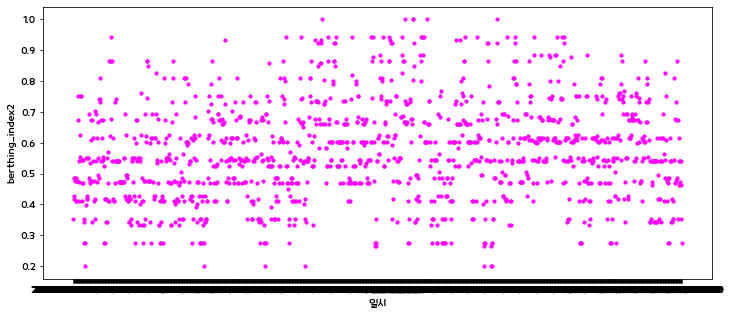

In [70]:
# plt.figure(figsize=(12, 5))
# plt.scatter(df_graph['일시'], df_graph['berthing_index2'],s=10,c='magenta')
# plt.xlabel('일시')
# plt.ylabel('berthing_index2')
# plt.show()

# DataFrame의 독도선착장 도착시간만 뽑아서 저장하기
## 5개 선사 도착시간
### 9:00 / 10:00 / 12:00 / 13:00 / 14:00 / 15:00 / 17:00

In [22]:
# df_rs = df[df['name'].str.contains('li')]

contains_berthing_time2 = data2018_1[data2018_1['일시'].str.contains(' 9:00|10:00|12:00|13:00|14:00|15:00|17:00')]

In [85]:
print(contains_berthing_time2)

                    일시  풍속(m/s)  풍향(deg)  유의파고(m)  wind_speed_index  \
9      2019-01-01 9:00      4.7      325      0.5                 4   
10    2019-01-01 10:00      5.0      334      0.5                 4   
13    2019-01-01 13:00      4.0      327      0.5                 4   
14    2019-01-01 14:00      5.3      310      0.5                 3   
15    2019-01-01 15:00      6.8      313      0.5                 3   
...                ...      ...      ...      ...               ...   
8656   2019-12-31 9:00     12.0      336      3.4                 2   
8657  2019-12-31 10:00     10.4      345      3.8                 2   
8660  2019-12-31 13:00      6.7       38      4.5                 3   
8661  2019-12-31 14:00      4.2       37      4.4                 4   
8663  2019-12-31 17:00      4.2       15      3.4                 4   

      wind_deg_index  wave_index  berthing_index  berthing_index2  
9                  5           5            4.62            0.924  
10         

In [23]:
output_file="data/berthing_index_2018_settime.csv"
contains_berthing_time2.to_csv(output_file, index=False)

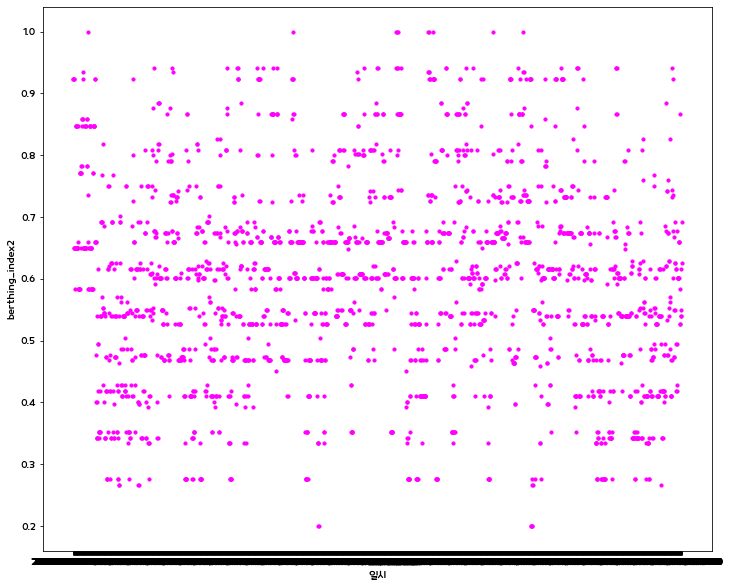

In [91]:
plt.figure(figsize=(12, 10))
plt.scatter(contains_berthing_time2['일시'], contains_berthing_time2['berthing_index2'],s=10,c='magenta')
plt.text(0.5, 1.05, 'plot(markersize=20)', fontdict={'size': 14})
plt.xlabel('일시')
plt.ylabel('berthing_index2')
plt.show()

In [ ]:
import seaborn as sns

sns.set(style='darkgrid')

%matplotlib inline

data_2018_2시스포빌 JD
10/1 (목)13:00 출발 - (1:30) - 14:30 도착-> 15:00
10/2 (금)13:00 출발 - (1:30) - 14:30 도착-> 15:00

11/6 (금)12:20 출발 - 2시 도착
11/7 (토)12:20 출발 - 2시 도착